# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_05_006
## Нелінійна фільтрація. Фільтри сегментації. Оператор (фільтр) Превіта

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

#### Завантаження тестового зображення. Зверніть увагу на градієнтний фон

In [2]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Test_BW_points.jpg'
test_im = io.imread(path + filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (200, 200, 3) IMAGE SIZE 120000
ROWS NUMBER 200 CLMS NUMBER 200 PIX NUMBER 40000 Bins 256


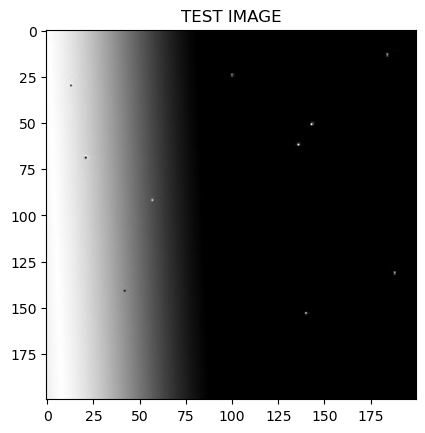

In [3]:
## Вивід оррігінального зображення  та зображення з шумомо 
plt.title('TEST IMAGE')
plt.imshow(test_im)
plt.show()

####  Фільтр (оператор) Превіта виділення точок

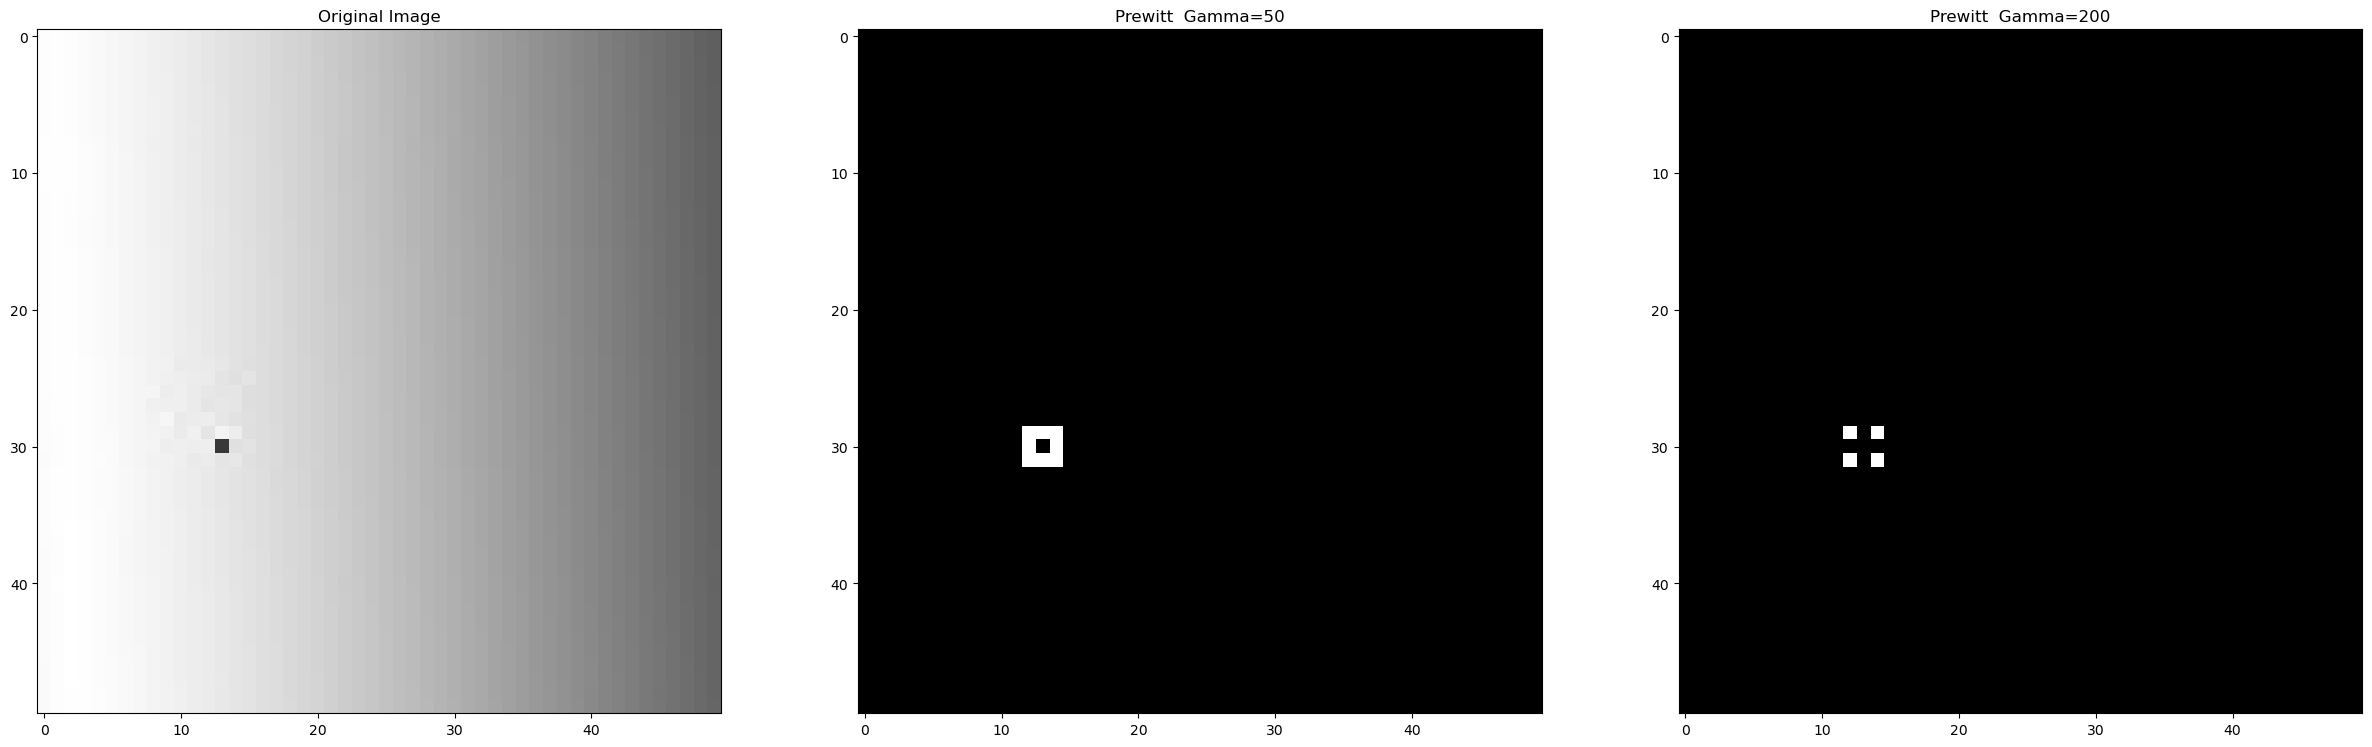

In [4]:
## Визначення параметрів маски
L = 3 ; mask_row = L ; mask_clm = L
Gamma1 = 50
Gamma2 = 200

## Визначення файлу перевореного зображення
test_im_ = np.int32(test_im) 
filtr_im_g1 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)
filtr_im_g2 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        GrX = test_im_[i-1,j+1,0]+test_im_[i,j+1,0]+test_im_[i+1,j+1,0] - test_im_[i-1,j-1,0] - test_im_[i,j-1,0] - test_im_[i+1,j-1,0]      
        GrY  = test_im_[i+1,j-1,0]+test_im_[i+1,j,0]+test_im_[i+1,j+1,0] - test_im_[i-1,j-1,0] - test_im_[i-1,j,0] - test_im_[i-1,j+1,0]      
        Gr = np.sqrt(GrX*GrX+GrY*GrY)
        if Gr >= Gamma1: filtr_im_g1 [i,j,:] = 255
        if Gr >= Gamma2: filtr_im_g2 [i,j,:] = 255
            

## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(test_im[0:50, 0:50, :])
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_g1[0:50, 0:50, :])
ax[1].set_title("Prewitt  Gamma=50")
ax[2].imshow(filtr_im_g2[0:50, 0:50, :])
ax[2].set_title("Prewitt  Gamma=200")
plt.show()

#### Виділення відрізков прямих ліній

In [5]:
## Завантаження файлу зображення
path = './images/'
filename = 'Test_BW_lines.jpg'
test_im = io.imread(path + filename)

## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (200, 200, 3) IMAGE SIZE 120000
ROWS NUMBER 200 CLMS NUMBER 200 PIX NUMBER 40000 Bins 256


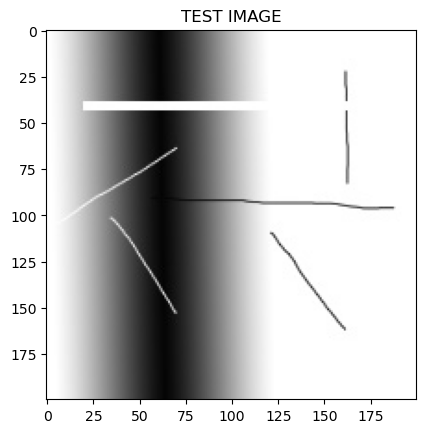

In [6]:
## Вивід тестовго зображення
plt.title('TEST IMAGE')
plt.imshow(test_im)
plt.show()

####  Фільтр (оператор) Превіта виділення відрізков прямих

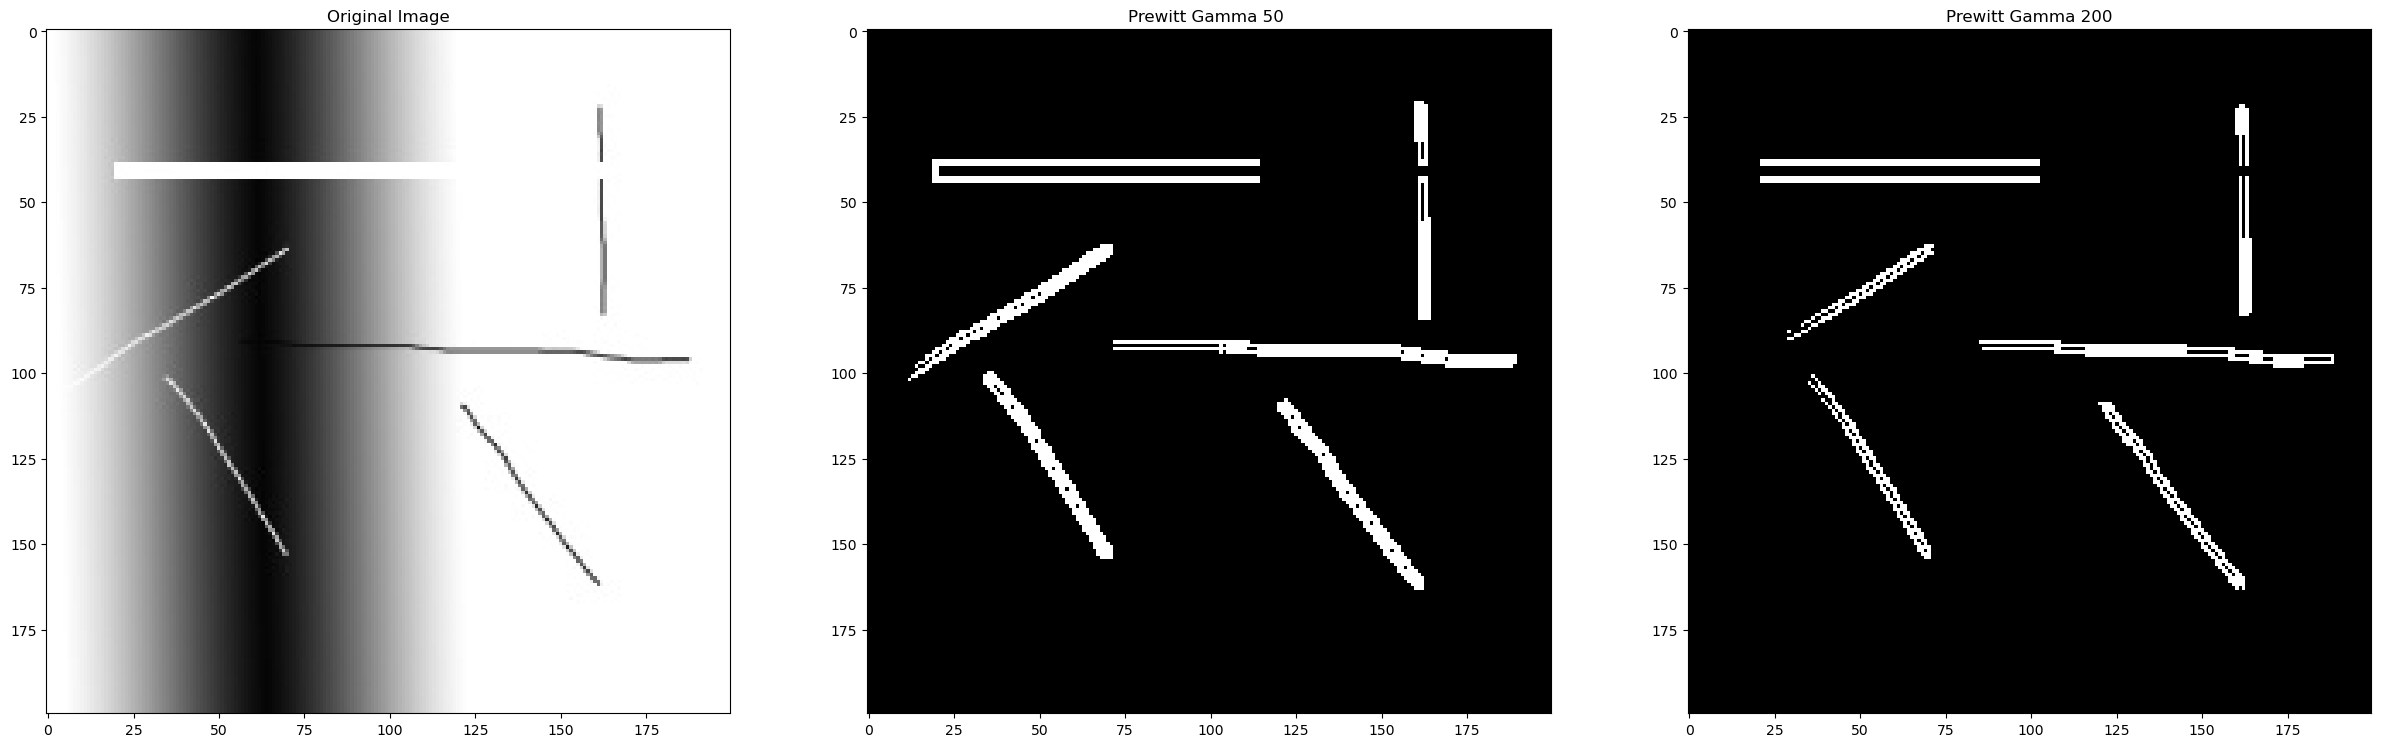

In [7]:
## Визначення параметрів маски
L = 3 ; mask_row = L ; mask_clm = L

Gamma1 = 50
Gamma2 = 200
## Визначення файлу перетвореного зображення
test_im_ = np.int32(test_im) 
filtr_im_g1 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)
filtr_im_g2 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        GrX = test_im_[i-1,j+1,0]+test_im_[i,j+1,0]+test_im_[i+1,j+1,0] - test_im_[i-1,j-1,0] - test_im_[i,j-1,0] - test_im_[i+1,j-1,0]      
        GrY  = test_im_[i+1,j-1,0]+test_im_[i+1,j,0]+test_im_[i+1,j+1,0] - test_im_[i-1,j-1,0] - test_im_[i-1,j,0] - test_im_[i-1,j+1,0]      
        Gr = np.sqrt(GrX*GrX+GrY*GrY)
        if Gr >= Gamma1: filtr_im_g1 [i,j,:] = 255
        if Gr >= Gamma2: filtr_im_g2 [i,j,:] = 255
            
            

## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_g1)
ax[1].set_title("Prewitt Gamma 50 ")
ax[2].imshow(filtr_im_g2)
ax[2].set_title("Prewitt Gamma 200")
plt.show()

#### Оператор Превіта з кольоровим зображенням

In [8]:
## Завантаження файлу зображення
filename = 'lenna.png'
path = './images/'
test_im_clr = io.imread(path+filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im_clr.shape[0] ## кількість рядків
clms_num = test_im_clr.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (200, 200, 3) IMAGE SIZE 120000
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


#### Перетворюємо в ахроматичне

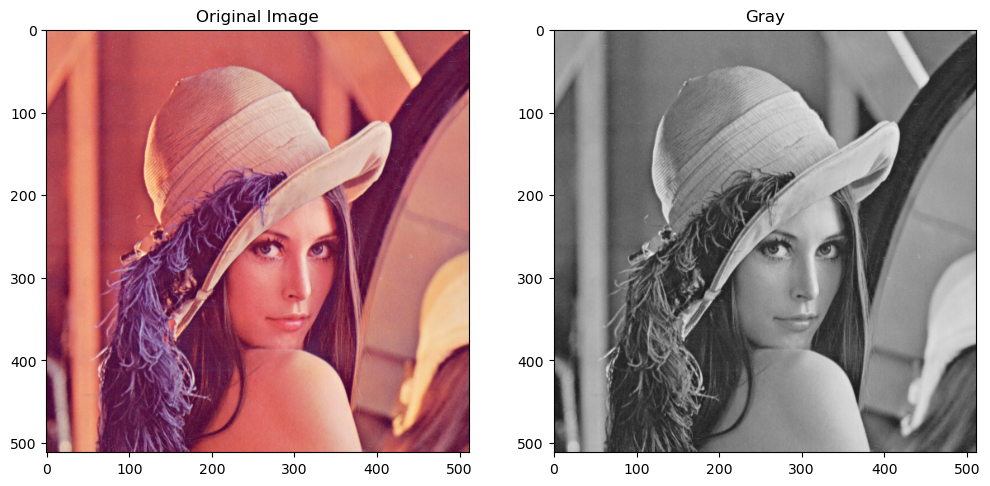

In [9]:
test_im_gray = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)

## ФОРМУВАННЯ НАПІСІРОГО ОРИГІНАЛЬНОГО ЗОБРАЖЕННЯ
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        test_im_gray [i, j, :] = 0.299*test_im_clr[i, j, 0]+0.587*test_im_clr[i, j, 1]+0.114*test_im_clr[ i, j, 2]
                
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()
ax[0].imshow(test_im_clr)
ax[0].set_title("Original Image")
ax[1].imshow(test_im_gray)
ax[1].set_title("Gray")
plt.show()


#### Застосовуємо оператор Превіта

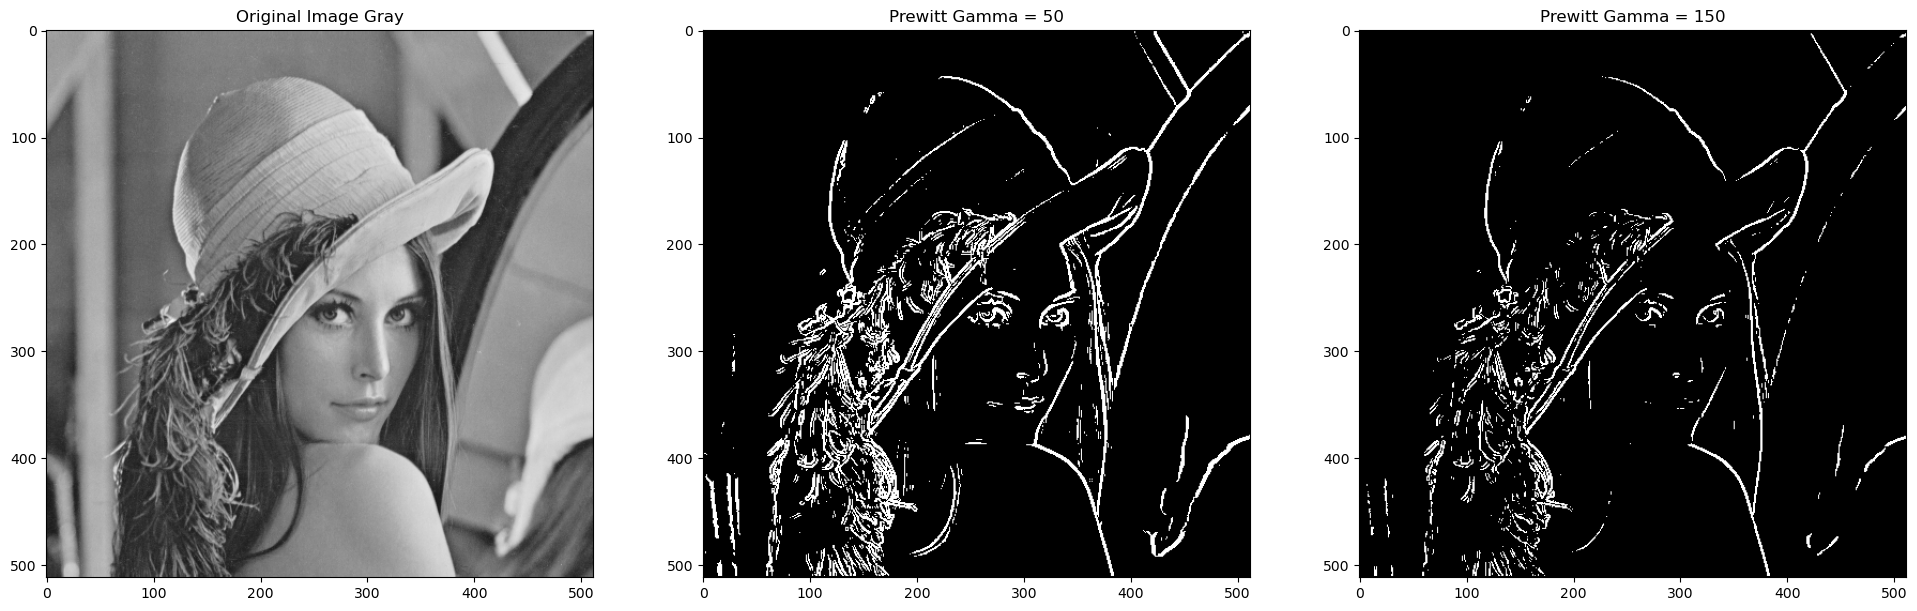

In [10]:
## Визначення параметрів маски
L = 3 ; mask_row = L ; mask_clm = L
Gamma1 = 100
Gamma2 = 150

## Визначення файлу перевореного зображення
test_im_gray_flt = np.int32(test_im_gray) 
filtr_im_g1 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)
filtr_im_g2 = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        GrX = test_im_gray_flt[i-1,j+1,0]+test_im_gray_flt[i,j+1,0]+test_im_gray_flt[i+1,j+1,0]\
            - test_im_gray_flt[i-1,j-1,0] - test_im_gray_flt[i,j-1,0] - test_im_gray_flt[i+1,j-1,0]      
        GrY = test_im_gray_flt[i+1,j-1,0]+test_im_gray_flt[i+1,j,0]+test_im_gray_flt[i+1,j+1,0]\
            - test_im_gray_flt[i-1,j-1,0] - test_im_gray_flt[i-1,j,0] - test_im_gray_flt[i-1,j+1,0]      
        Gr = np.sqrt(GrX*GrX+GrY*GrY)
        if Gr >= Gamma1: filtr_im_g1 [i,j,:] = 255
        if Gr >= Gamma2: filtr_im_g2 [i,j,:] = 255

        ## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
ax = axes.ravel()
ax[0].imshow(test_im_gray_flt)
ax[0].set_title("Original Image Gray")
ax[1].imshow(filtr_im_g1)
ax[1].set_title("Prewitt Gamma = 50")
ax[2].imshow(filtr_im_g2)
ax[2].set_title("Prewitt Gamma = 150")
plt.show()